<a href="https://colab.research.google.com/github/sourovdeybd71/1st-Data-Innovators-Challenge-/blob/main/Data_Ananlysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


# **Basic Analysis of the Dataset**

In [ ]:
df = pd.read_csv('ecommerce_customer_behavior_dataset.csv')

df.head()


,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

**No missing data entries in any of the 15 columns.**

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


In [ ]:
categorical_columns = ['Gender', 'Location', 'Product Category', 'Device Type',
                       'Payment Method', 'Discount Availed', 'Return Customer',
                       'Subscription Status', 'Customer Satisfaction']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Gender: ['Other' 'Male' 'Female']
Unique values in Location: ['Dhaka' 'Rangpur' 'Khulna' 'Rajshahi' 'Sylhet' 'Mymensingh' 'Barisal'
 'Chittagong']
Unique values in Product Category: ['Toys' 'Sports' 'Home' 'Beauty' 'Books' 'Groceries' 'Electronics'
 'Clothing']
Unique values in Device Type: ['Mobile' 'Desktop' 'Tablet']
Unique values in Payment Method: ['Cash on Delivery' 'Bank Transfer' 'Debit Card' 'PayPal' 'Credit Card']
Unique values in Discount Availed: [ True False]
Unique values in Return Customer: [ True False]
Unique values in Subscription Status: ['Free' 'Premium' 'Trial']
Unique values in Customer Satisfaction: ['Low' 'Medium' 'High']


In [ ]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Location,object
Product Category,object
Purchase Amount ($),float64
Time Spent on Website (min),int64
Device Type,object
Payment Method,object
Discount Availed,bool


# **Answer to the LEVEL-1 questions**

In [ ]:
# Mean, Median, Mode for Age
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")


Mean Age: 43.7899, Median Age: 44.0, Mode Age: 51


**Insight: Older people appear to be the main customers of the business.**

In [ ]:
# Variance and Standard Deviation for Purchase Amount
variance_purchase = df['Purchase Amount ($)'].var()
std_purchase = df['Purchase Amount ($)'].std()

# Z-Score for Purchase Amount
z_scores = stats.zscore(df['Purchase Amount ($)'])

print(f"Variance: {variance_purchase}, Standard Deviation: {std_purchase}")
df['Z_Score_Purchase'] = z_scores
df

Variance: 81932.24073019275, Standard Deviation: 286.23808399685873


,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z_Score_Purchase,Customer Satisfaction Numeric
0,1,20,2,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,1,4,True,5,4,0,Low,-1.052856,1
1,2,39,1,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,1,1,False,1,7,0,Medium,0.531219,2
2,3,64,1,Khulna,Home,963.65,9,Tablet,Bank Transfer,0,8,True,4,9,1,Medium,1.606287,2
3,4,65,2,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,1,1,True,5,10,2,Medium,-0.063945,2
4,5,67,1,Rangpur,Home,143.27,17,Tablet,Debit Card,0,8,True,4,1,1,High,-1.259932,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,48,2,Chittagong,Electronics,99.23,32,Desktop,PayPal,1,2,True,3,7,1,Medium,-1.413798,2
9996,9997,35,2,Rangpur,Books,797.81,2,Mobile,Bank Transfer,1,1,False,3,9,1,High,1.026880,3
9997,9998,50,2,Mymensingh,Sports,820.17,17,Mobile,Credit Card,1,8,True,3,11,2,High,1.105001,3
9998,9999,24,0,Khulna,Groceries,34.94,3,Mobile,Debit Card,0,3,True,3,5,0,Medium,-1.638412,2


**A variance of 81,932 means that the purchase amounts vary significantly || Most purchase amounts are about $286 away from the average purchase amount.**

In [ ]:
 # Top 3 Product Categories by number of purchases
top_categories = df['Product Category'].value_counts().head(3)
print(top_categories)

Product Category
Electronics    1309
Clothing       1297
Toys           1288
Name: count, dtype: int64


In [ ]:
# Count of Return Customers
return_customers_count = df[df['Return Customer'] == True].shape[0]
print(f"Number of return customers: {return_customers_count}")


Number of return customers: 4996


In [ ]:
# Average Review Score
average_review_score = df['Review Score (1-5)'].mean()
print(f"Average Review Score: {average_review_score}")


Average Review Score: 2.9951


**Overall customer satisfaction may be somewhat low.**

In [ ]:
#average delivery time vary between subscription statuses (Free, Premium)
filtered_data = df[df['Subscription Status'].isin(['Free', 'Premium'])]

avg_delivery_time = filtered_data.groupby('Subscription Status')['Delivery Time (days)'].mean()
print(avg_delivery_time)



Subscription Status
Free       6.963924
Premium    7.070347
Name: Delivery Time (days), dtype: float64


**The company should focus on improving the delivery speed for premium members**

In [ ]:
# Count of premium subscribed customers
premium_customers = df[df['Subscription Status'] == 'Premium'].shape[0]
print(f"Number of premium customers: {premium_customers}")


Number of premium customers: 3369


In [ ]:
# Percentage of customers by device type
device_percentages = df['Device Type'].value_counts(normalize=True) * 100
print(device_percentages)


Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: proportion, dtype: float64


**The percentages of customers using different device types—mobile, desktop, and tablet—are nearly equal**

In [ ]:
# Average Purchase Amount for those who availed discounts vs those who didn’t
avg_purchase_discount = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
print(avg_purchase_discount)


Discount Availed
False    502.511451
True     505.264178
Name: Purchase Amount ($), dtype: float64


**This shows that customers who used discounts tend to spend a bit more than those who didn't.**

In [ ]:
# Most common Payment Method
most_common_payment = df['Payment Method'].mode()[0]
print(f"Most common payment method: {most_common_payment}")


Most common payment method: Bank Transfer


# **Visualization of Level-1 Questions**


In [ ]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


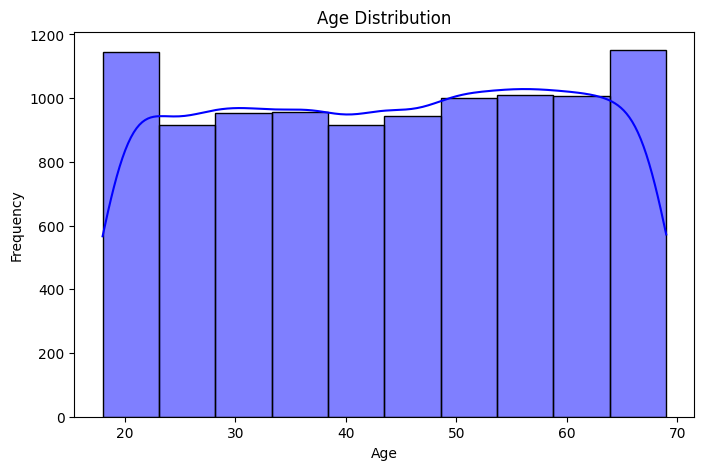

In [ ]:
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


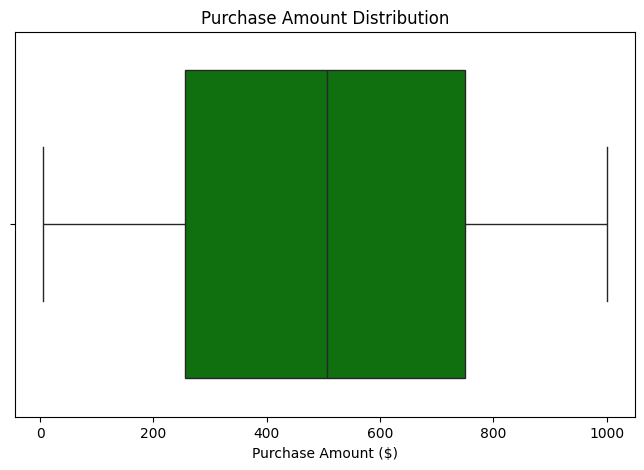

In [ ]:
# Boxplot for Purchase Amount
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Purchase Amount ($)'], color='green')
plt.title('Purchase Amount Distribution')
plt.show()


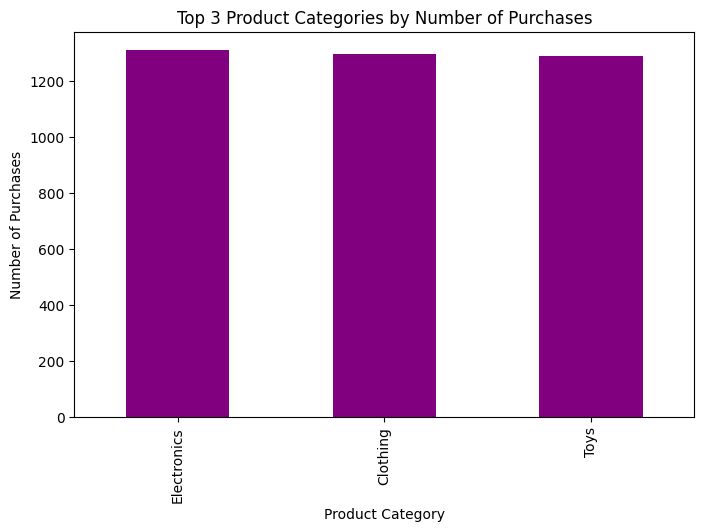

In [ ]:
# Top 3 Product Categories by Number of Purchases
top_categories = df['Product Category'].value_counts().nlargest(3)

plt.figure(figsize=(8,5))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 3 Product Categories by Number of Purchases')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()


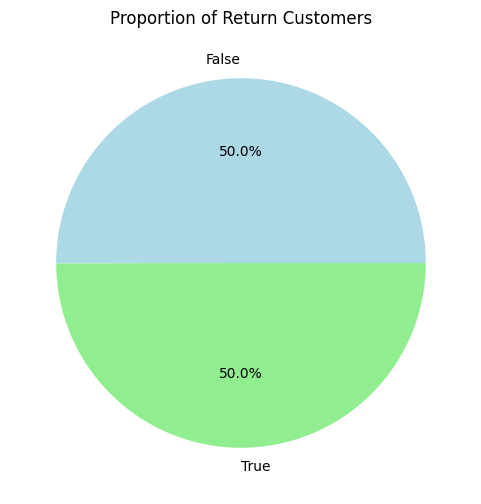

In [ ]:
# Return Customers
return_customers = df['Return Customer'].value_counts()

plt.figure(figsize=(6,6))
return_customers.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Return Customers')
plt.ylabel('')
plt.show()


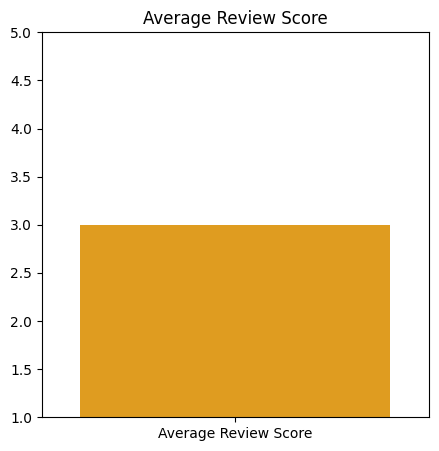

In [ ]:
# Average Review Score
average_review_score = df['Review Score (1-5)'].mean()

plt.figure(figsize=(5,5))
sns.barplot(x=['Average Review Score'], y=[average_review_score], color='orange')
plt.title('Average Review Score')
plt.ylim(1, 5)
plt.show()


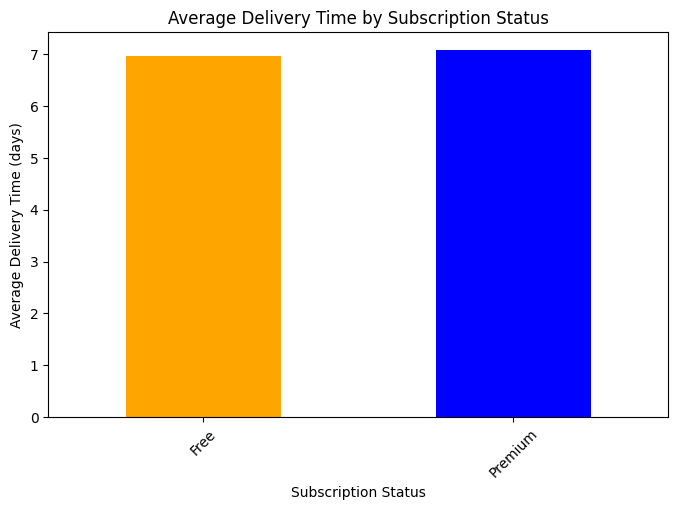

In [ ]:
# Filter the DataFrame to include only Free and Premium subscription statuses
filtered_data = df[df['Subscription Status'].isin(['Free', 'Premium'])]

avg_delivery_time = filtered_data.groupby('Subscription Status')['Delivery Time (days)'].mean()

plt.figure(figsize=(8, 5))
avg_delivery_time.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Delivery Time by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()

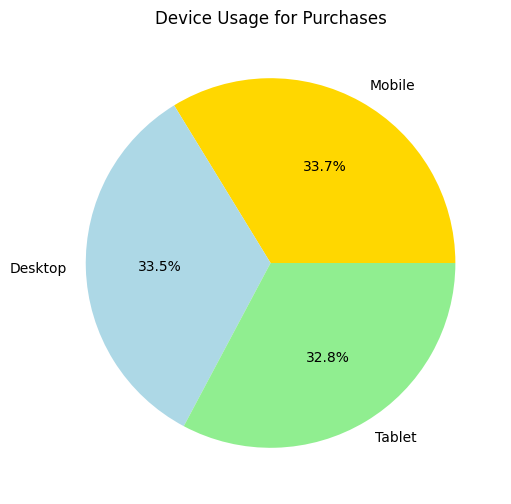

In [ ]:
# Plot device usage
device_usage = df['Device Type'].value_counts()

plt.figure(figsize=(6,6))
device_usage.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Device Usage for Purchases')
plt.ylabel('')
plt.show()


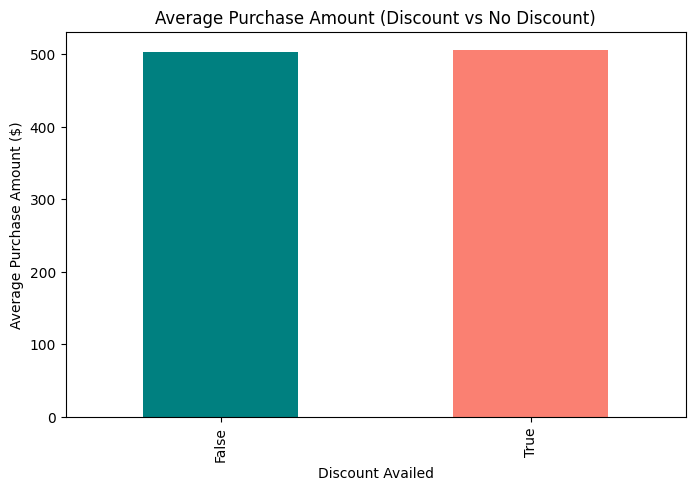

In [ ]:
# Average purchase amount for discounted vs. non-discounted customers
avg_purchase_by_discount = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()

plt.figure(figsize=(8,5))
avg_purchase_by_discount.plot(kind='bar', color=['teal', 'salmon'])
plt.title('Average Purchase Amount (Discount vs No Discount)')
plt.ylabel('Average Purchase Amount ($)')
plt.show()


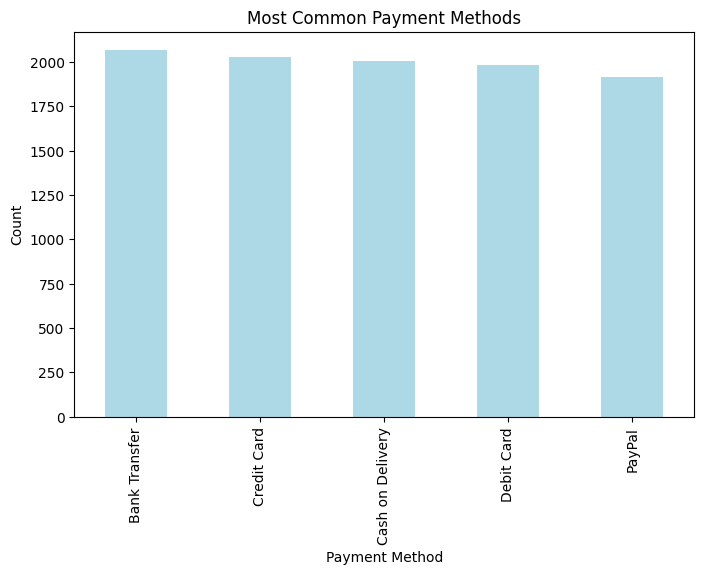

In [ ]:
# Plot for payment methods
payment_method_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(8,5))
payment_method_counts.plot(kind='bar', color='lightblue')
plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


# **Answer to the LEVEL 2 Questions**

In [ ]:
#average review scores of users of the most common payment method

most_common_payment_method = df['Payment Method'].mode()[0]
common_payment_method_data = df[df['Payment Method'] == most_common_payment_method]

average_review_score = common_payment_method_data['Review Score (1-5)'].mean()

print(f"Most common payment method: {most_common_payment_method}")
print(f"Average review score of users of the most common payment method: {average_review_score:.2f}")


Most common payment method: Bank Transfer
Average review score of users of the most common payment method: 2.99


In [ ]:
# Correlation between 'Time Spent on Website' and 'Purchase Amount'
correlation = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])

# Check if customers who spend more time on the website purchase more items
correlation_items = df['Time Spent on Website (min)'].corr(df['Number of Items Purchased'])

print(f"Correlation between time spent on website and purchase amount: {correlation:.2f}")
print(f"Correlation between time spent on website and number of items purchased: {correlation_items:.2f}")


Correlation between time spent on website and purchase amount: 0.01
Correlation between time spent on website and number of items purchased: 0.00


**Correlation between 'Time Spent on Website' and 'Purchase Amount' = 0.01: This indicates spending more time on the site doesn't significantly affect how much customers spend**

**Correlation between time spent on website and number of items purchased: 0.00 : There is also no relationship between the time spent on the site and how many items customers buy**

In [ ]:
#customers who are satisfied (rating of 4 or 5)
satisfied_customers = df[df['Review Score (1-5)'] >= 4]

#satisfied customers who are also return customers
satisfied_and_return_customers = satisfied_customers[satisfied_customers['Return Customer'] == True]

# Calculate the percentage of customers who are satisfied and return customers
percentage_satisfied_return_customers = (len(satisfied_and_return_customers) / len(df)) * 100

print(f"Percentage of satisfied and return customers: {percentage_satisfied_return_customers:.2f}%")


Percentage of satisfied and return customers: 20.08%


In [ ]:
#correlation between 'Number of Items Purchased' and 'Customer Satisfaction Numeric'
df['Customer Satisfaction Numeric'] = df['Customer Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3})

correlation_satisfaction_items = df['Number of Items Purchased'].corr(df['Customer Satisfaction Numeric'])

print(f"Correlation between number of items purchased and customer satisfaction: {correlation_satisfaction_items:.2f}")


Correlation between number of items purchased and customer satisfaction: -0.01


**Correlation between number of items purchased and customer satisfaction= -0.01 : This suggests that as the number of items purchased increases, customer satisfaction does not improve and may slightly decrease**

In [ ]:
#location with the second-highest average purchase amount
location_avg_purchase = df.groupby('Location')['Purchase Amount ($)'].mean()

sorted_location_avg_purchase = location_avg_purchase.sort_values(ascending=False)
second_highest_location = sorted_location_avg_purchase.index[1]
print(f"The location with the 2nd highest average purchase amount is: {second_highest_location}")


The location with the 2nd highest average purchase amount is: Barisal


<ipython-input-38-e6b833558ad2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[most_common_payment_method], y=[average_review_score], palette="viridis")


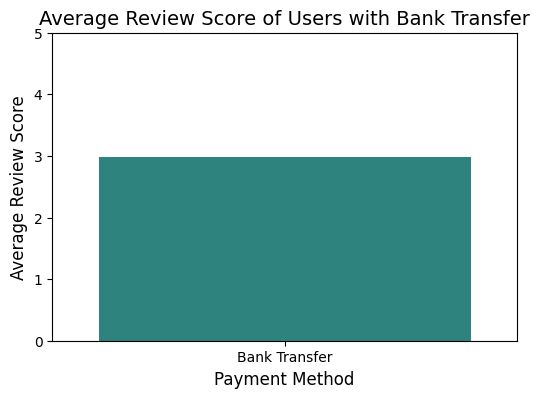

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

most_common_payment_method = df['Payment Method'].mode()[0]

common_payment_method_data = df[df['Payment Method'] == most_common_payment_method]

average_review_score = common_payment_method_data['Review Score (1-5)'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=[most_common_payment_method], y=[average_review_score], palette="viridis")

plt.title(f'Average Review Score of Users with {most_common_payment_method}', fontsize=14)
plt.ylabel('Average Review Score', fontsize=12)
plt.ylim(0, 5)
plt.xlabel('Payment Method', fontsize=12)

plt.show()


# **Answer To the Question no-1 of Level-3**

**To get factors contribute most to a customer being classified as a return customer - at first we need to find the correlation between Return Customer against rest of the columns**

In [ ]:
from scipy.stats import pearsonr, pointbiserialr
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

correlation_dict = {}

binary_columns = ['Discount Availed', 'Return Customer', 'Gender', 'Subscription Status']
numerical_columns = ['Age', 'Purchase Amount ($)', 'Number of Items Purchased',
                     'Review Score (1-5)', 'Delivery Time (days)', 'Time Spent on Website (min)']

categorical_columns = ['Gender', 'Location', 'Product Category', 'Payment Method', 'Customer Satisfaction', 'Subscription Status']

for col in numerical_columns:
    corr, _ = pearsonr(df['Return Customer'], df[col])
    correlation_dict[col] = corr

for col in binary_columns:
    if col != 'Return Customer':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        corr, _ = pointbiserialr(df['Return Customer'], df[col])
        correlation_dict[col] = corr

for col in categorical_columns:
    confusion_matrix = pd.crosstab(df['Return Customer'], df[col])
    cramers_v_value = cramers_v(confusion_matrix.to_numpy())
    correlation_dict[col] = cramers_v_value

correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation with Return Customer'])
correlation_df = correlation_df.sort_values(by='Correlation with Return Customer', ascending=False)
print(correlation_df)


                             Correlation with Return Customer
Location                                             0.026414
Discount Availed                                     0.025003
Product Category                                     0.023204
Gender                                               0.022077
Payment Method                                       0.017552
Delivery Time (days)                                 0.013922
Customer Satisfaction                                0.012218
Subscription Status                                  0.009939
Review Score (1-5)                                   0.008757
Purchase Amount ($)                                  0.001924
Number of Items Purchased                            0.000815
Time Spent on Website (min)                         -0.006286
Age                                                 -0.008255


**We can clearly see that Location, Discount Availed, and Product Category are the top 3 factors of Return Customer - Below we've ploted for only these 3 factors**

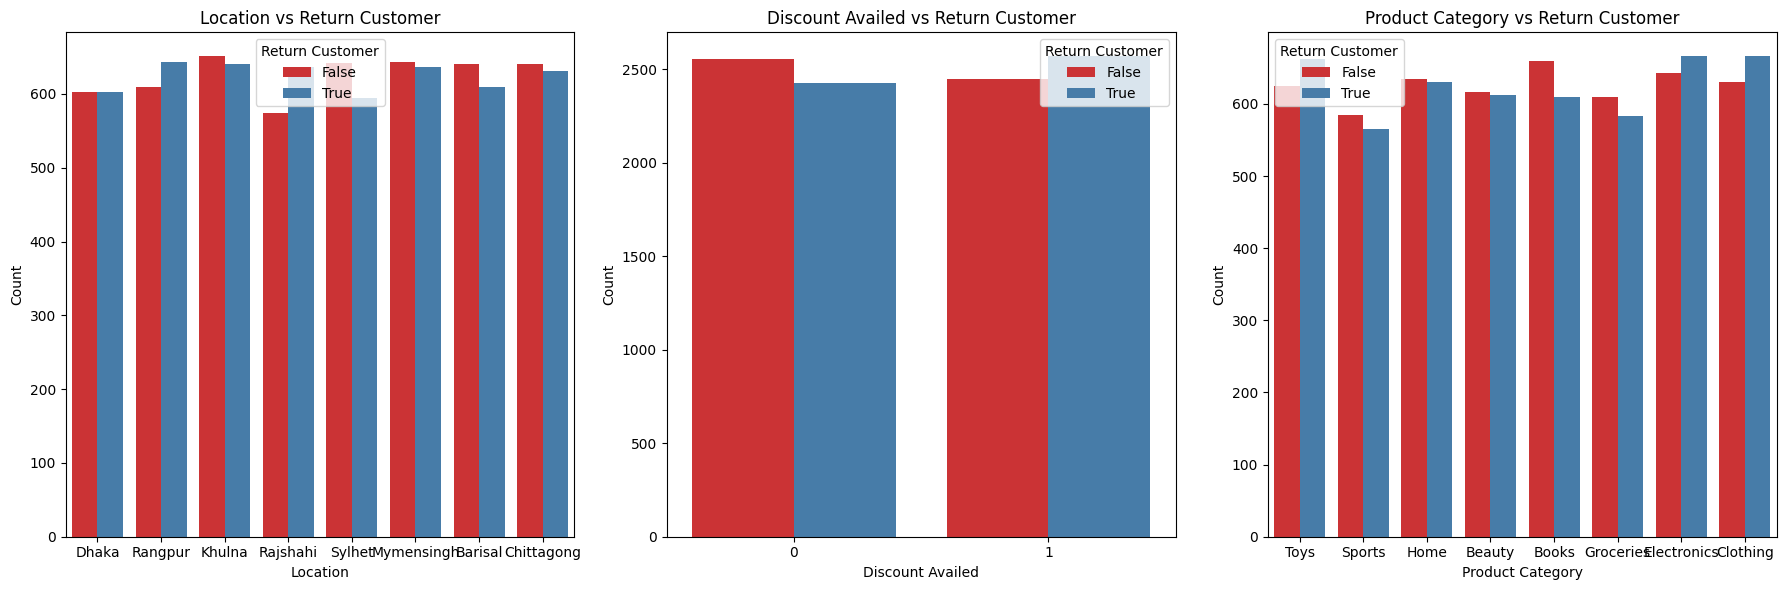

In [ ]:
import seaborn as sns

plt.figure(figsize=(18, 6))

# Plot 1: Location vs Return Customer
plt.subplot(1, 3, 1)
sns.countplot(x='Location', hue='Return Customer', data=df, palette='Set1')
plt.title('Location vs Return Customer')
plt.xlabel('Location')
plt.ylabel('Count')

# Plot 2: Discount Availed vs Return Customer
plt.subplot(1, 3, 2)
sns.countplot(x='Discount Availed', hue='Return Customer', data=df, palette='Set1')
plt.title('Discount Availed vs Return Customer')
plt.xlabel('Discount Availed')
plt.ylabel('Count')

# Plot 3: Product Category vs Return Customer
plt.subplot(1, 3, 3)
sns.countplot(x='Product Category', hue='Return Customer', data=df, palette='Set1')
plt.title('Product Category vs Return Customer')
plt.xlabel('Product Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# **Answer to the Question 3 of Level 3**

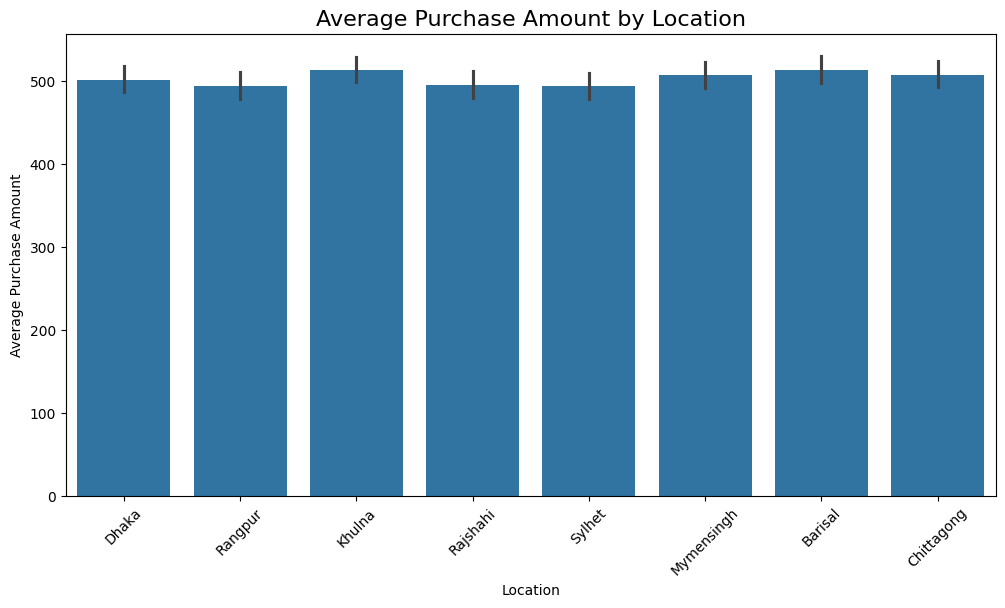

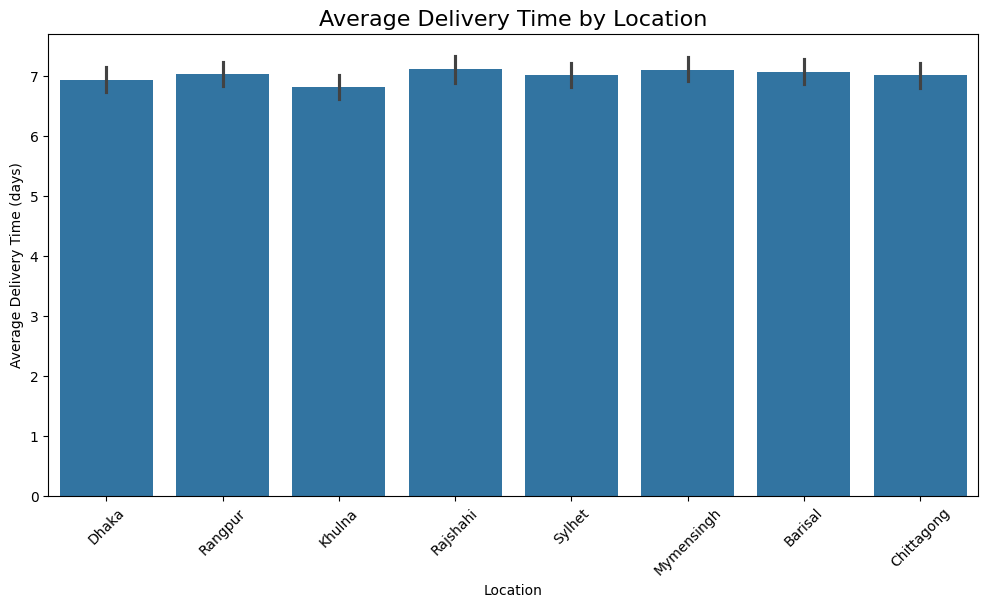

In [ ]:
# Step 1: Purchase Amount by Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Purchase Amount ($)', data=df, estimator='mean')
plt.title('Average Purchase Amount by Location', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# Step 2: Delivery Time by Location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Delivery Time (days)', data=df, estimator='mean')
plt.title('Average Delivery Time by Location', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()


**We can see from the above graphs that on the occassion of purchase amount people of Khulna and Barisal purchase slightly more than the rest of the cities**

**When it comes to delivery time in the Khulna divission company takes more time to deliver products than the rest.**

# **Answer to the Q4 of Level-3**

**I will share 2 major insights from the above questions that I think the company can work on**

# 1.
Premium members wait a little longer for their deliveries (7.07 days) than free users (6.96 days).

This is surprising because premium members should get faster service. If this isn't fixed, premium users might get unhappy. To keep them satisfied, businesses should focus on faster shipping or offer features like tracking to make the wait feel better.

# 2.

The average age of customers is around 44 years, and the most common age (mode) is 51 years. This indicates that middle-aged or older customers make up a significant portion of the user base.

# Other Insights to Enhance Business Strategy

## **1- Key Factors Influencing Customer Satisfaction**

In [3]:

df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'Product Category', 'Device Type',
                                         'Payment Method', 'Discount Availed', 'Return Customer',
                                         'Subscription Status'], drop_first=True)

correlation_with_satisfaction = df_encoded.corr()['Customer Satisfaction'].sort_values()

print(correlation_with_satisfaction)


Location_Mymensingh               -0.022063
Gender_Male                       -0.020646
Payment Method_Cash on Delivery   -0.019493
Age                               -0.016492
Product Category_Clothing         -0.012789
Device Type_Mobile                -0.012540
Customer ID                       -0.011872
Product Category_Sports           -0.010364
Return Customer_True              -0.010170
Subscription Status_Premium       -0.008666
Location_Rajshahi                 -0.008488
Time Spent on Website (min)       -0.007707
Review Score (1-5)                -0.007614
Number of Items Purchased         -0.006425
Delivery Time (days)              -0.006325
Purchase Amount ($)               -0.004769
Location_Sylhet                   -0.003888
Product Category_Groceries        -0.003295
Payment Method_PayPal             -0.002278
Location_Khulna                   -0.000776
Location_Chittagong                0.001014
Product Category_Toys              0.001410
Product Category_Home           

###**My insights:**
The dataset doesn't show any strong correlations between the available columns and customer satisfaction. This suggests that satisfaction might depend on qualitative factors such as customer service, product quality, or subjective experiences that aren't captured in this dataset.

The collection of additional data, such as product quality feedback or customer service ratings may help the company in near future.

## **2- Product Category Preference by Subscription Type**

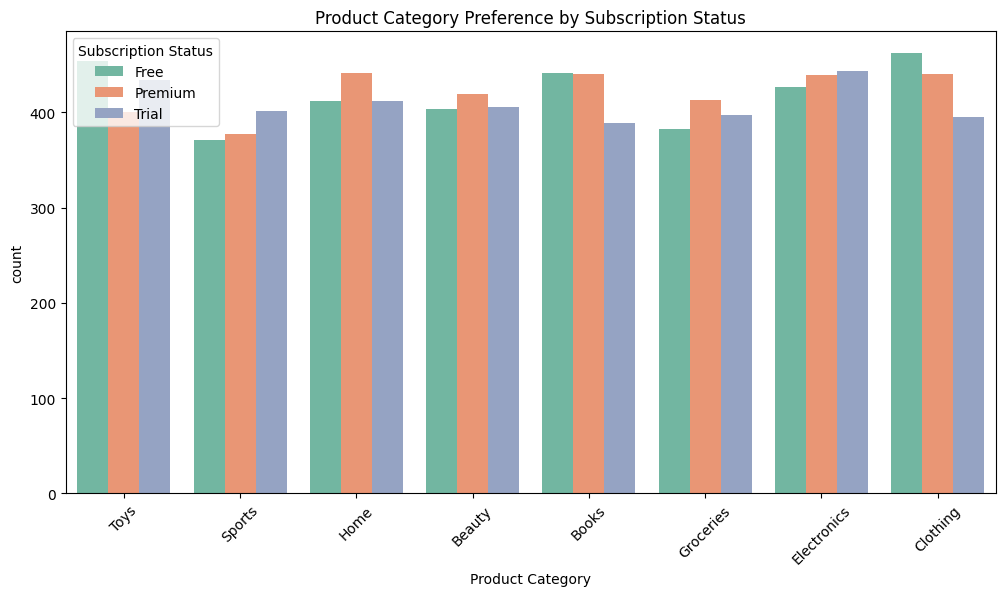

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', hue='Subscription Status', data=df, palette='Set2')
plt.title('Product Category Preference by Subscription Status')
plt.xticks(rotation=45)
plt.show()



###**Insight:**
From the above graph company can create targeted marketing campaigns based on the subscription type.

**For example**: In the Clothing category, customers with a Free subscription made the most purchases, with about 500 items bought. Premium members bought around 400, while Trial users bought close to 350. This shows that free users really like clothing, and trial users are trying different things before deciding on a plan.